In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../../shared_data/round3/'
days = [0, 1, 2]

activity = [pd.read_csv(path + f'prices_round_3_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)
activity

bid_price_1  bid_volume_1  bid_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 7999           111          NaN   
STRAWBERRIES 0   0                 3999           210          NaN   
ROSES        0   0                14999            72          NaN   
GIFT_BASKET  0   0                71348            19      71347.0   
                 100              71344             1      71343.0   
...                                 ...           ...          ...   
             2   999800           69537             2      69536.0   
CHOCOLATE    2   999900            7749           143          NaN   
GIFT_BASKET  2   999900           69551             1      69550.0   
STRAWBERRIES 2   999900            3984           240          NaN   
ROSES        2   999900           14411            59          NaN   

                            bid_volume_2  bid_price_3  bid_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71342.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69535.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69549.0          20.0   
STRAWBERRIES 2   999900              NaN          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            ask_price_1  ask_volume_1  ask_price_2  \
product      day timestamp                                           
CHOCOLATE    0   0                 8001           111          NaN   
STRAWBERRIES 0   0                 4001           210          NaN   
ROSES        0   0                15001            72          NaN   
GIFT_BASKET  0   0                71362            19      71363.0   
                 100              71355             1      71356.0   
...                                 ...           ...          ...   
             2   999800           69547             2      69548.0   
CHOCOLATE    2   999900            7751           143          NaN   
GIFT_BASKET  2   999900           69561             1      69562.0   
STRAWBERRIES 2   999900            3985            92       3986.0   
ROSES        2   999900           14412            59          NaN   

                            ask_volume_2  ask_price_3  ask_volume_3  \
product      day timestamp                                            
CHOCOLATE    0   0                   NaN          NaN           NaN   
STRAWBERRIES 0   0                   NaN          NaN           NaN   
ROSES        0   0                   NaN          NaN           NaN   
GIFT_BASKET  0   0                  24.0          NaN           NaN   
                 100                12.0      71357.0          20.0   
...                                  ...          ...           ...   
             2   999800             18.0      69550.0          24.0   
CHOCOLATE    2   999900              NaN          NaN           NaN   
GIFT_BASKET  2   999900             19.0      69564.0          20.0   
STRAWBERRIES 2   999900            148.0          NaN           NaN   
ROSES        2   999900              NaN          NaN           NaN   

                            mid_price  profit_and_loss  
product      day timestamp                              
CHOCOLATE    0   0             8000.0              0.0  
STRAWBERRIES 0   0             4000.0              0.0  
ROSES        0   0            15000.0              0.0  
GIFT_BASKET  0   0            71355.0              0.0  
                

In [3]:
activity.index.get_level_values('product').unique()

Index(['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET'], dtype='object', name='product')

### CHOCOLATE

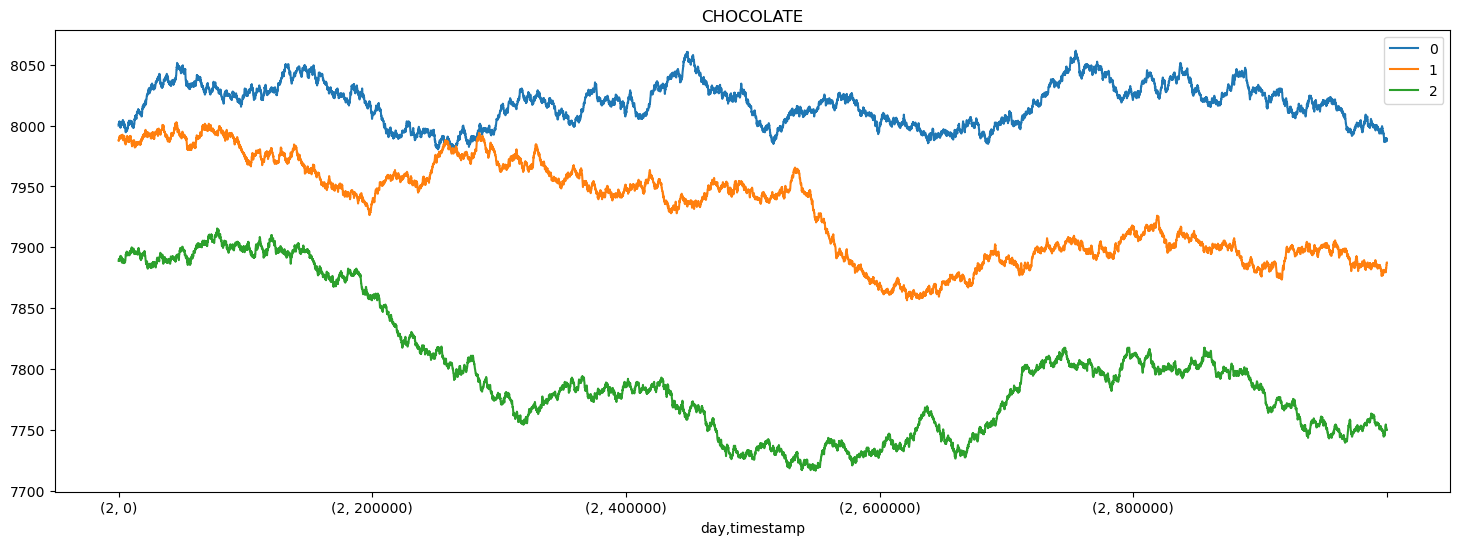

In [4]:
symbol = 'CHOCOLATE'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

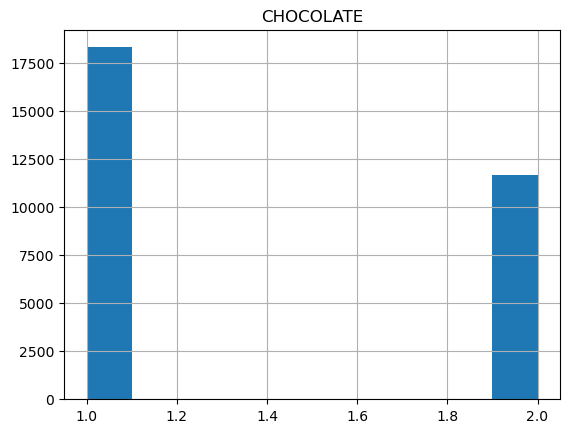

In [5]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

### STRAWBERRIES

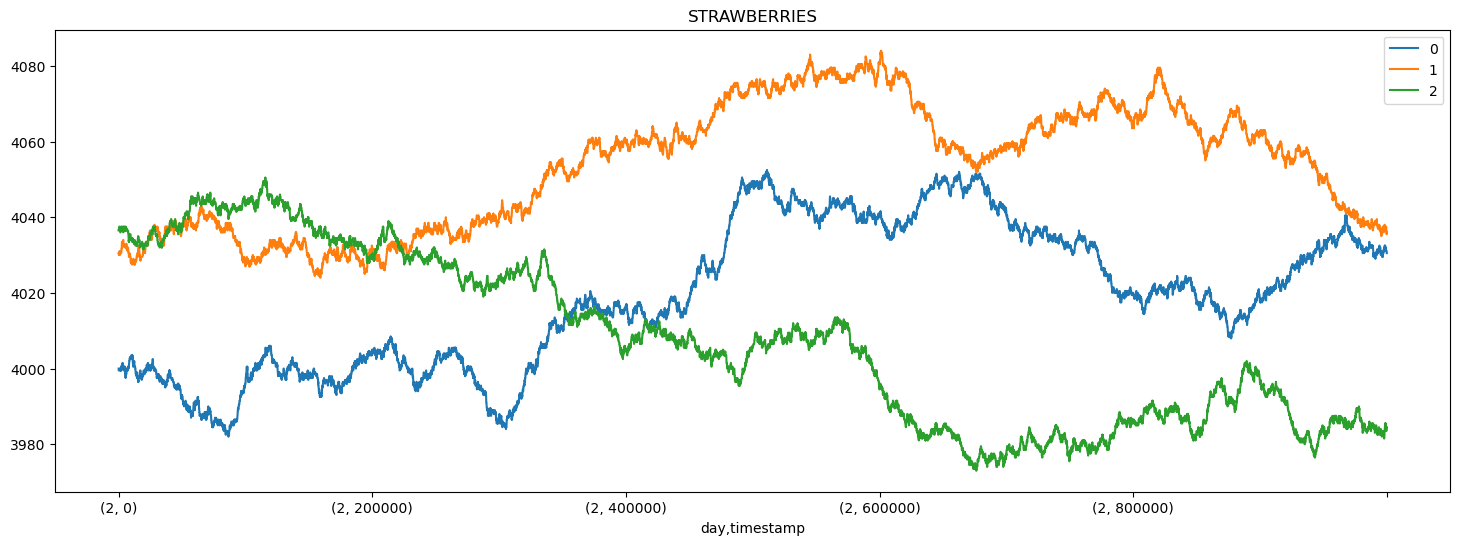

In [6]:
symbol = 'STRAWBERRIES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

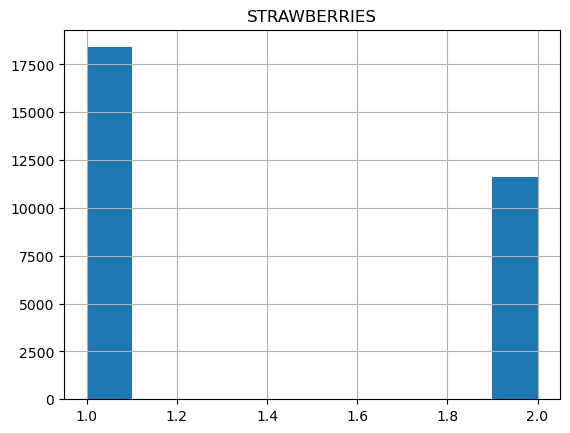

In [7]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

### ROSES

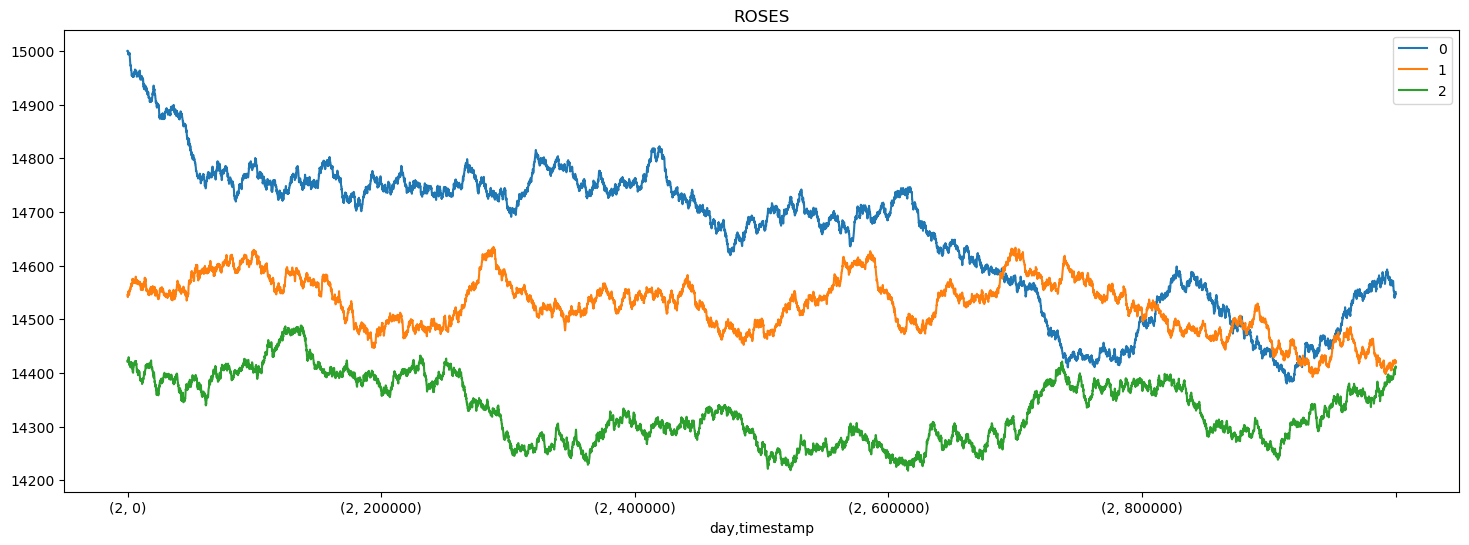

In [8]:
symbol = 'ROSES'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

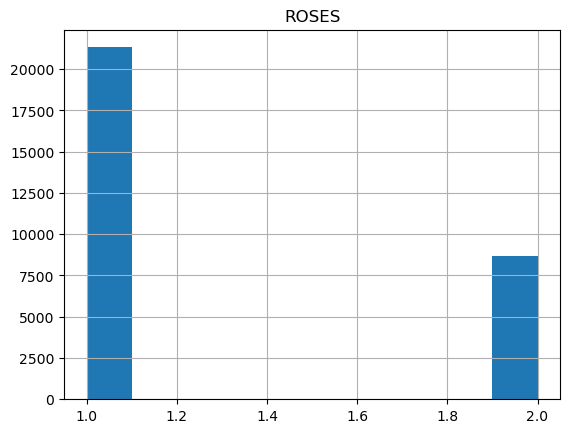

In [9]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

### GIFT_BASKET

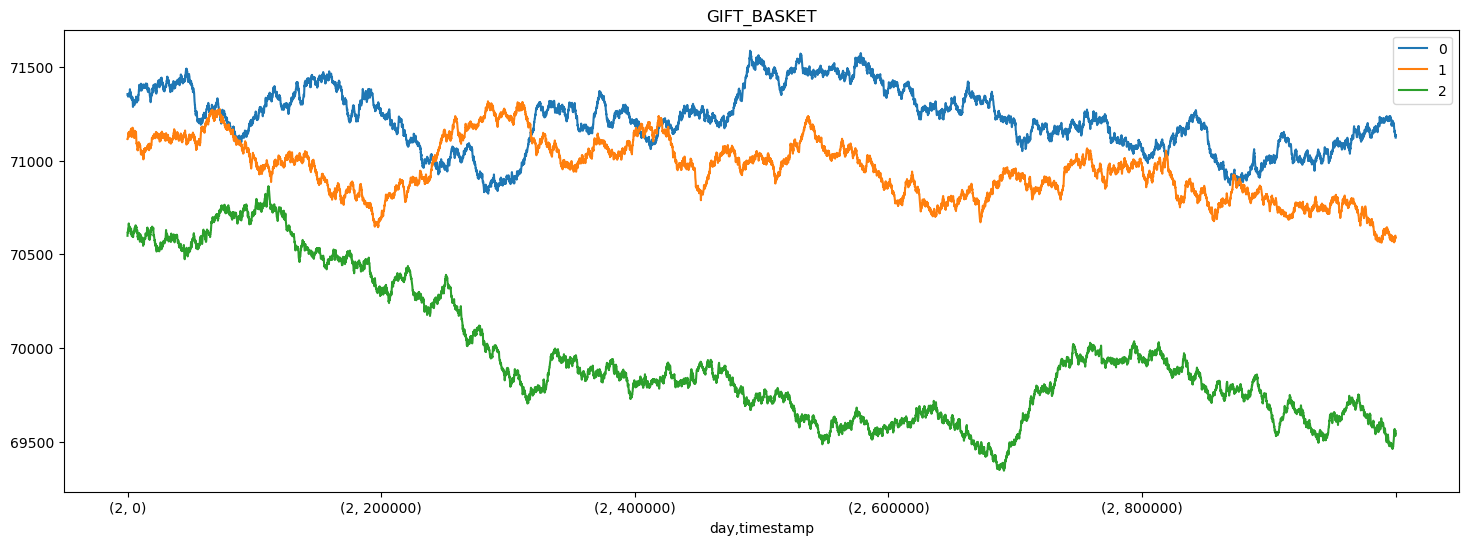

In [10]:
symbol = 'GIFT_BASKET'
plt.figure(figsize=(18, 6))
activity.loc[symbol].groupby('day')['mid_price'].plot(legend=True)
plt.title(symbol)
plt.show()

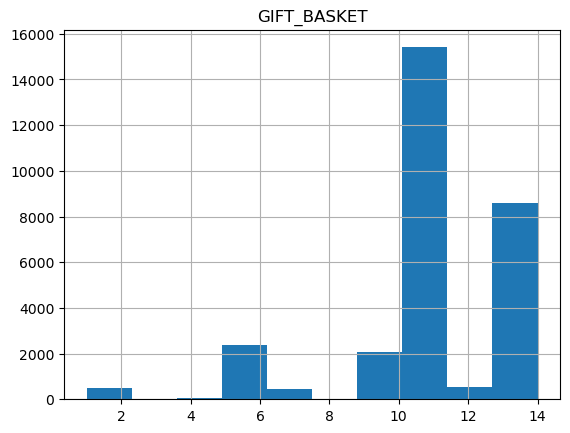

In [11]:
activity.loc[symbol].groupby('day').apply(lambda x: x['ask_price_1'] - x['bid_price_1']).hist()
plt.title(symbol)
plt.show()

### Difference

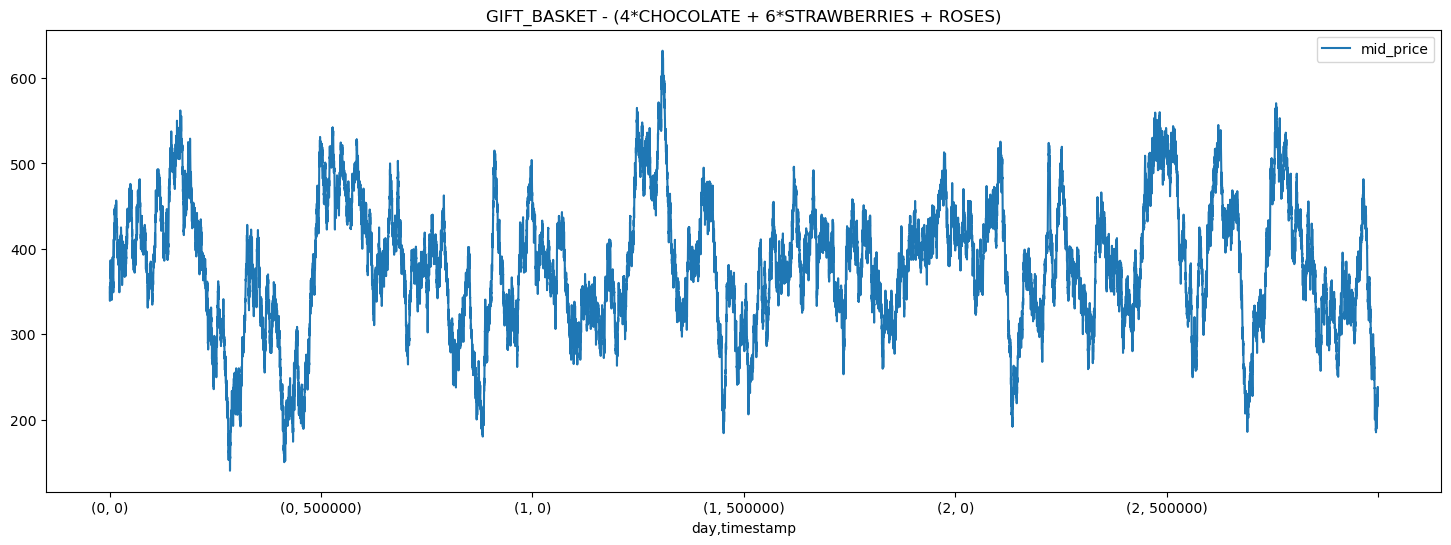

In [29]:
individual = 4*activity.loc['CHOCOLATE']['mid_price'] + 6*activity.loc['STRAWBERRIES']['mid_price'] + activity.loc['ROSES']['mid_price']
total = activity.loc['GIFT_BASKET']['mid_price']
diff = total - individual

plt.figure(figsize=(18, 6))
diff.plot(legend=True)
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.show()

In [13]:
diff.describe()

count    30000.000000
mean       379.490483
std         76.424382
min        140.000000
25%        329.000000
50%        381.000000
75%        430.000000
max        632.000000
Name: mid_price, dtype: float64

In [14]:
individual_shift = individual + 379.5

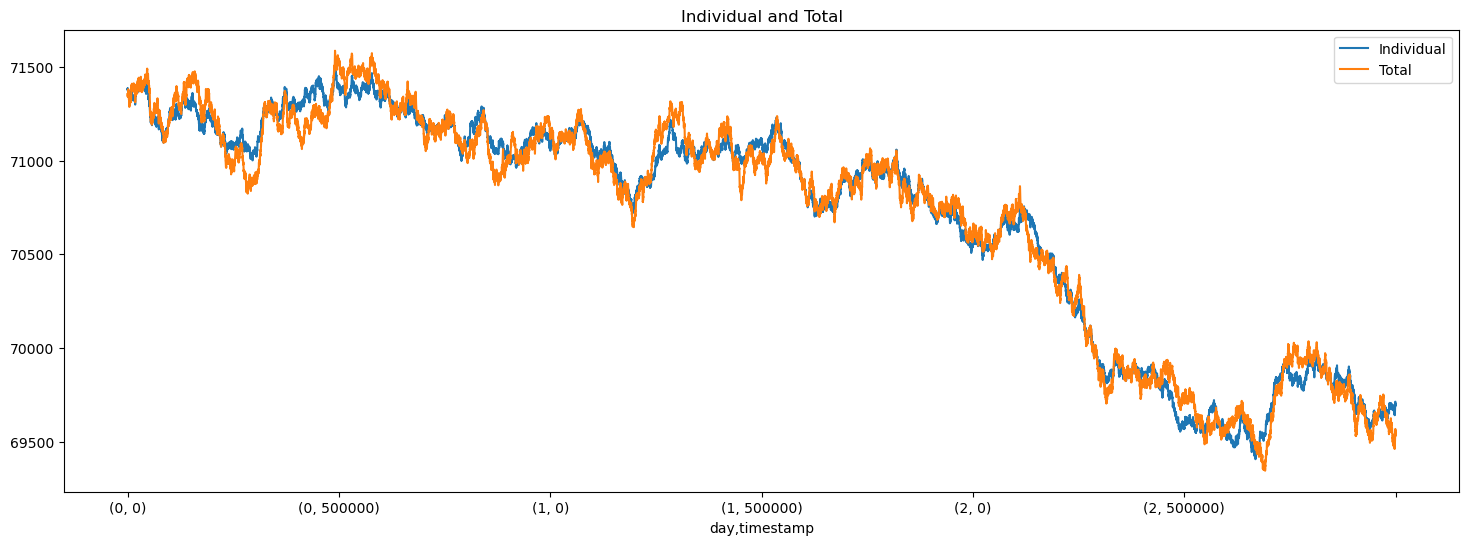

In [15]:
plt.figure(figsize=(18, 6))
individual_shift.plot(legend=True, label='Individual')
total.plot(legend=True, label='Total')
plt.title('Individual and Total')   
plt.show()

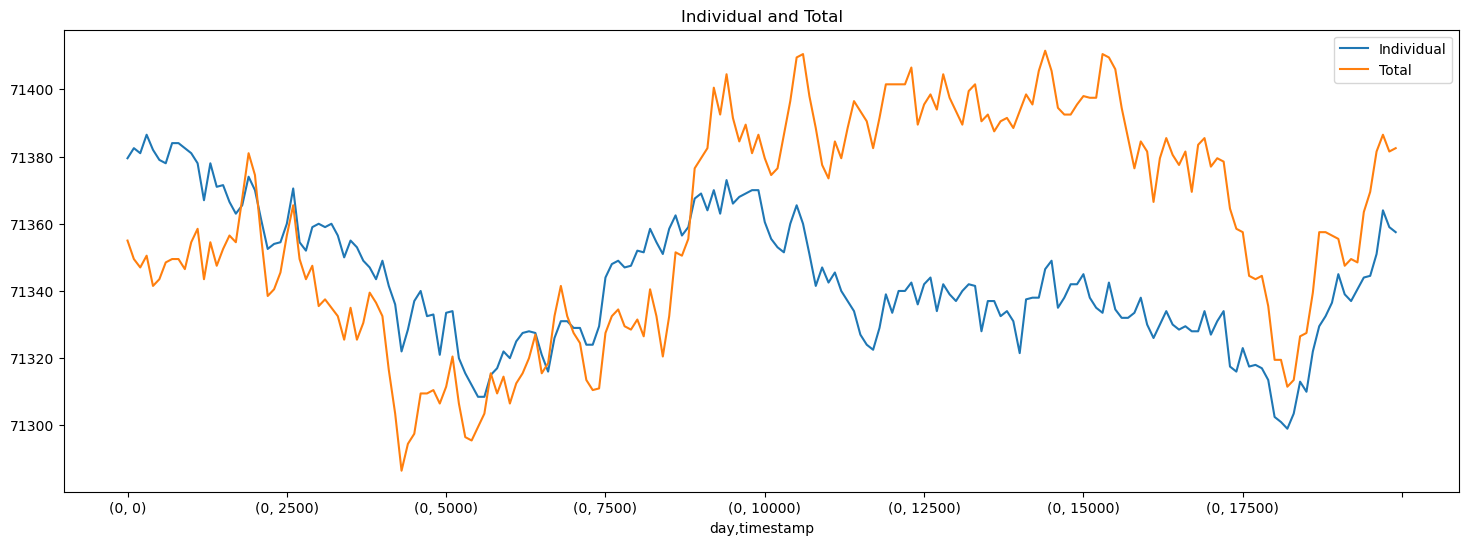

In [16]:
plt.figure(figsize=(18, 6))
individual_shift[:200].plot(legend=True, label='Individual')
total[:200].plot(legend=True, label='Total')
plt.title('Individual and Total')   
plt.show()

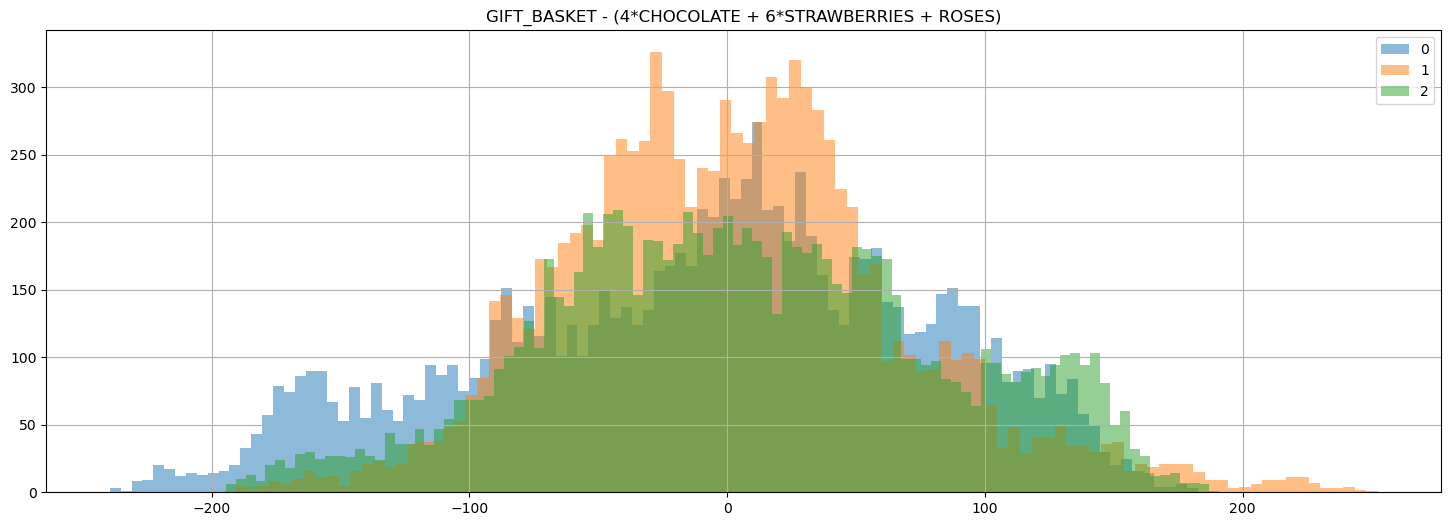

In [30]:
diff_shift = diff - 379.5

diff_shift.groupby('day').hist(bins=100, alpha=0.5, figsize=(18, 6))
plt.title('GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES)')
plt.legend(days)
plt.show()

In [31]:
diff_shift.groupby('day').describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
0,10000.0,-9.26940,85.293178,-239.5,-69.5,0.0,53.5,182.5
1,10000.0,2.44180,65.750569,-195.5,-42.0,0.5,39.5,252.5
2,10000.0,6.79905,76.072587,-194.5,-47.5,3.5,59.0,191.0


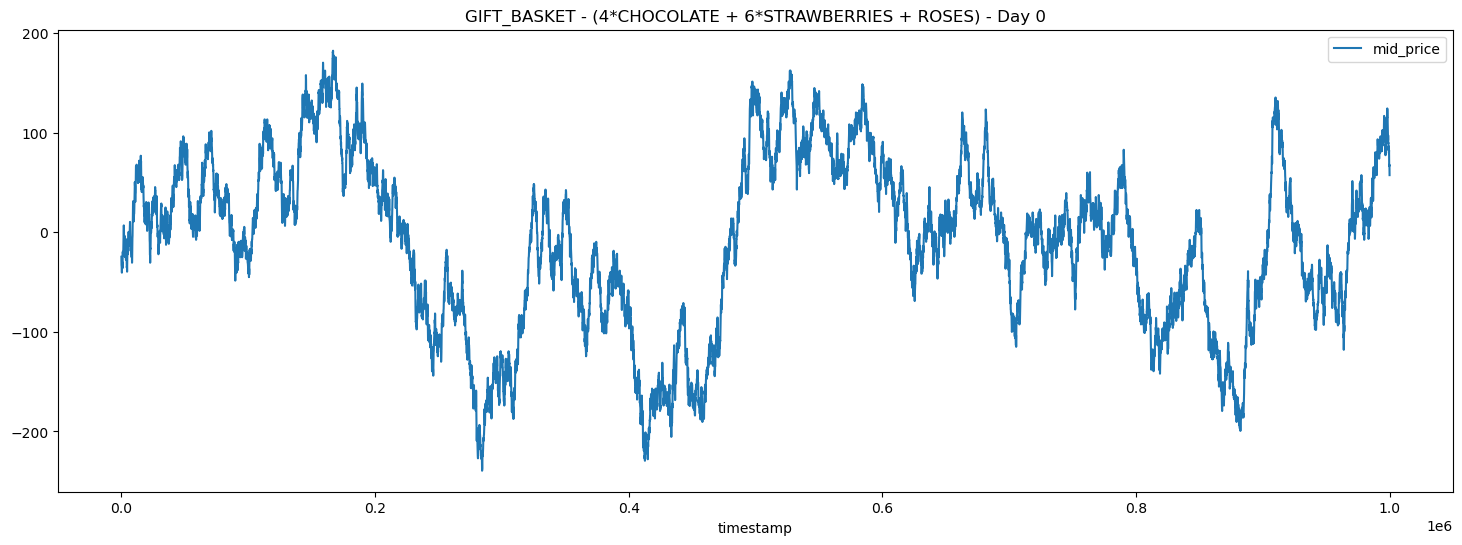

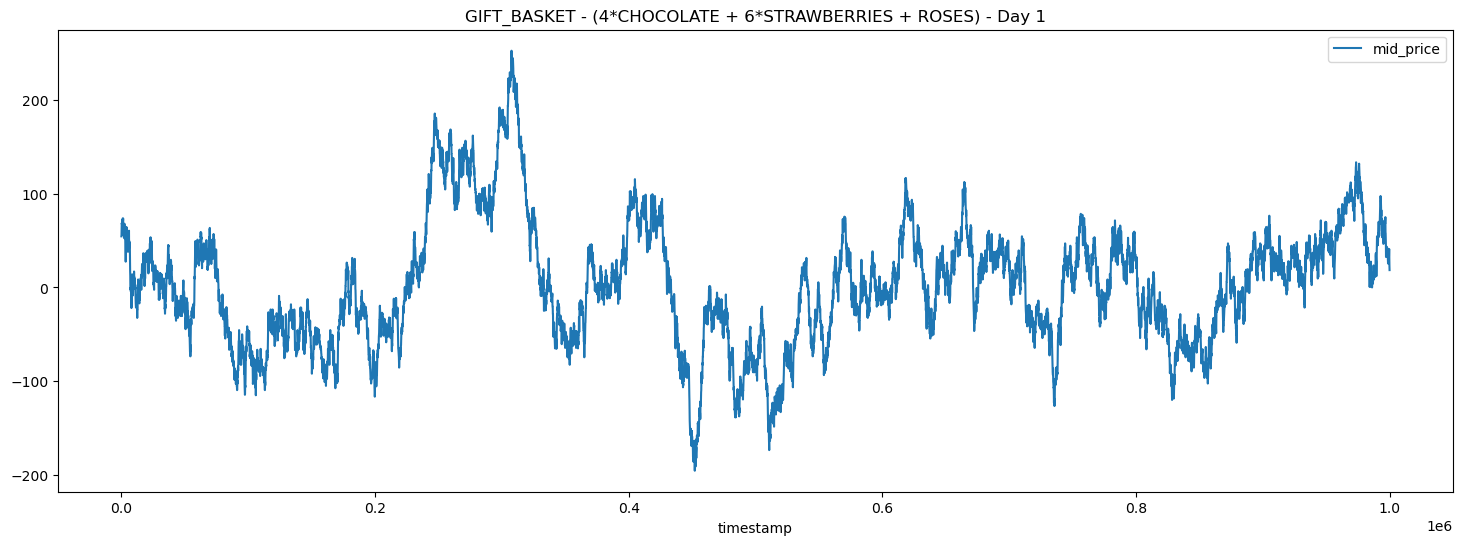

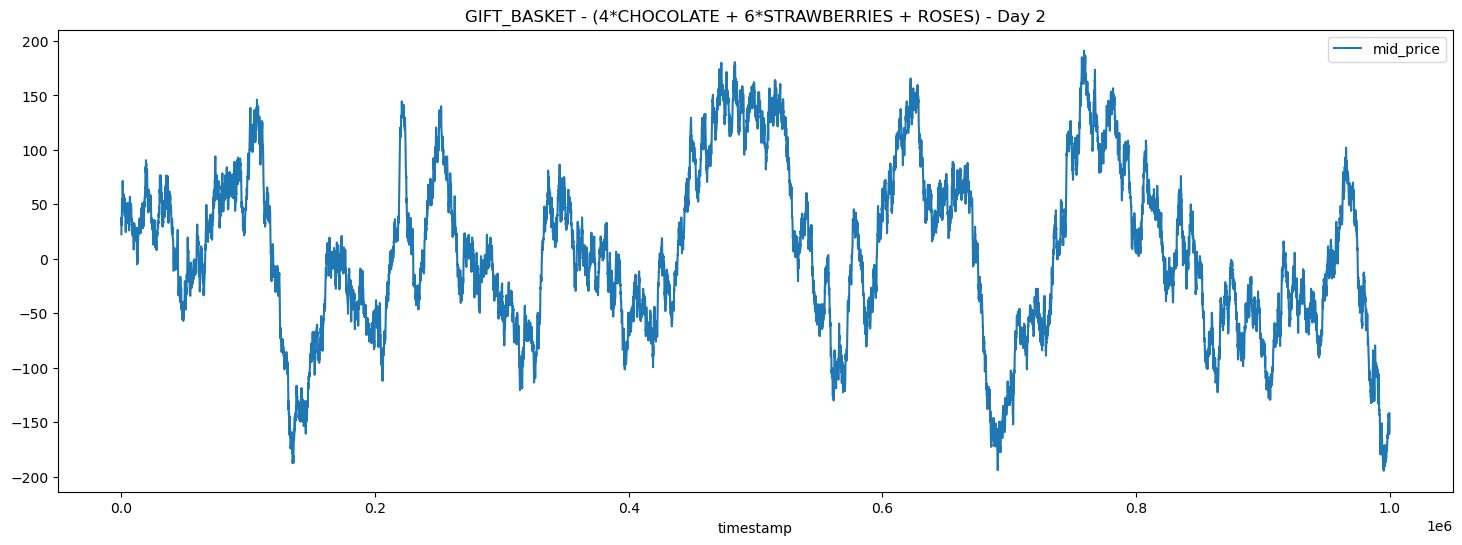

In [37]:
for d in days:
    plt.figure(figsize=(18, 6))
    diff_shift.loc[d].plot(legend=True)
    plt.title(f'GIFT_BASKET - (4*CHOCOLATE + 6*STRAWBERRIES + ROSES) - Day {d}')
    plt.show()